Con los datos sin procesamiento alguno, sin pre ni aumento de datos voy a probar a entrenar con YOLOv9, la versión más reciente de YOLO hasta el momento.

Mantengo también las etiquetas original, incluso aunque no haya un balanceo.

https://docs.ultralytics.com/models/yolov9/#performance-on-ms-coco-dataset

In [1]:
#voy a comprobar primero que tengo acceso a la GPU, es fundamental para hacer un entrenamiento en un tiempo prudente
import torch
cuda_available = torch.cuda.is_available()
print("CUDA disponible:", cuda_available)

CUDA disponible: True


In [2]:
from ultralytics import YOLO

#Voy a hacer transfer learning de un modelo pre-entrenado
model = YOLO('yolov9e.pt')  #voy a ver si el modelo más grande lo puedo trabajar con mi ordenador
model.info()

YOLOv9e summary: 1225 layers, 58206592 parameters, 0 gradients, 193.0 GFLOPs


(1225, 58206592, 0, 193.01565439999996)

In [3]:
#entrenamos el modelo
results = model.train(data='/home/ana/TFM/datasets/desperfectos moviles.v1i.yolov9/data.yaml', epochs=100, imgsz=640, batch=-1)

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/home/ana/TFM/datasets/desperfectos moviles.v1i.yolov9/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

/home/ana/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AutoBatch: Computing optimal batch size for imgsz=640
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU) 5.80G total, 0.58G reserved, 0.47G allocated, 4.75G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    58152622       192.7         1.934         38.88         77.27        (1, 3, 640, 640)                    list
    58152622       385.4         3.106         62.55         87.15        (2, 3, 640, 640)                    list
    58152622       770.9         5.780         118.3         143.2        (4, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 600.00 MiB. GPU 


/home/ana/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 128.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,


CUDA out of memory. Tried to allocate 14.00 MiB. GPU 
AutoBatch: Using batch-size 1 for CUDA:0 2.94G/5.80G (51%) ✅


/home/ana/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
/home/ana/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 52.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
train: Scanning /home/ana/TFM/datasets/desperfectos moviles.v1i.yolov9/train/labels.cache... 665 images, 50 backgrounds, 0 corrupt: 100%|██████████| 665/665 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/ana/TFM/datasets/desperfectos moviles.v1i.yolov9/train/images/IMG_0105-4-_png.rf.7a02d9c42533370dd344d72f57e26258.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 70, len(boxes) = 11794. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/ana/TFM/datasets/desperfectos moviles.v1i.yolov9/valid/labels.cache... 130 images, 8 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.89G      2.475      6.456      1.015         28        640: 100%|██████████| 665/665 [01:38<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/65 [00:00<?, ?it/s]/home/ana/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 13.31it/s]

                   all        130       2457    0.00115     0.0158   0.000789   0.000188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.76G      2.755      3.649       1.05          1        640: 100%|██████████| 665/665 [01:34<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.15it/s]

                   all        130       2457    0.00142     0.0472   0.000881   0.000263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.76G      2.845      2.992      1.106          3        640: 100%|██████████| 665/665 [01:31<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.93it/s]

                   all        130       2457   0.000649    0.00639   0.000482    0.00015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.84G      3.016      2.884      1.135         11        640: 100%|██████████| 665/665 [01:39<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.85it/s]

                   all        130       2457   0.000501    0.00307   0.000352      6e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.84G      2.778       2.75       1.05         30        640: 100%|██████████| 665/665 [01:29<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 16.79it/s]

                   all        130       2457   6.68e-05    0.00151   3.39e-05   5.65e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.76G      2.908      2.823       1.09          0        640: 100%|██████████| 665/665 [01:39<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.70it/s]


                   all        130       2457   0.000141    0.00245   0.000404   4.41e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.76G      2.811      2.725      1.028         53        640: 100%|██████████| 665/665 [01:35<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.24it/s]

                   all        130       2457    0.00266     0.0014    0.00146   0.000215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.76G      2.759      2.661       1.03          4        640: 100%|██████████| 665/665 [01:19<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.54it/s]

                   all        130       2457    0.00218    0.00383    0.00126   0.000437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.76G      2.852      2.767      1.089          1        640: 100%|██████████| 665/665 [01:28<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.66it/s]

                   all        130       2457    0.00179    0.00544    0.00123   0.000283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.76G      2.927      2.796      1.086         88        640: 100%|██████████| 665/665 [01:26<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.45it/s]

                   all        130       2457   0.000361    0.00304   0.000753   9.79e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.76G       2.91      2.724      1.026         12        640: 100%|██████████| 665/665 [01:37<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.59it/s]

                   all        130       2457    0.00144    0.00343   0.000798    8.8e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.76G      2.997      2.798      1.107          3        640: 100%|██████████| 665/665 [01:40<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.84it/s]


                   all        130       2457   7.79e-05      0.001   0.000108   2.98e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.77G       3.06      2.854      1.141          8        640: 100%|██████████| 665/665 [01:40<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 16.32it/s]

                   all        130       2457   0.000681    0.00595   0.000383   8.66e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.76G      3.031      2.845      1.103         18        640: 100%|██████████| 665/665 [01:24<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.54it/s]

                   all        130       2457   0.000793    0.00436   0.000497   0.000144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.84G      2.845      2.683      1.052          0        640: 100%|██████████| 665/665 [01:37<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.84it/s]

                   all        130       2457    0.00113    0.00825   0.000854   0.000121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.84G      2.954      2.782      1.071          7        640: 100%|██████████| 665/665 [01:40<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.82it/s]

                   all        130       2457   0.000795    0.00697     0.0006   0.000112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.84G      2.875      2.698      1.037         32        640: 100%|██████████| 665/665 [01:41<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.86it/s]

                   all        130       2457    0.00125    0.00619    0.00139   0.000307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.76G      2.867      2.602     0.9804         48        640: 100%|██████████| 665/665 [01:40<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.52it/s]

                   all        130       2457   0.000996     0.0082     0.0012   0.000306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.76G      2.888      2.761      1.046          5        640: 100%|██████████| 665/665 [01:57<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.24it/s]

                   all        130       2457    0.00222    0.00716    0.00155   0.000456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.76G      2.946      2.723      1.047          8        640: 100%|██████████| 665/665 [01:47<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.28it/s]

                   all        130       2457   0.000961    0.00746     0.0011   0.000135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.76G      2.959      2.717      1.013         36        640: 100%|██████████| 665/665 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.69it/s]

                   all        130       2457    0.00162    0.00847    0.00135   0.000273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.77G      2.932      2.709      1.009         30        640: 100%|██████████| 665/665 [01:18<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.43it/s]

                   all        130       2457    0.00442    0.00651    0.00309    0.00061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.77G      2.912      2.719      1.001          6        640: 100%|██████████| 665/665 [01:26<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.45it/s]

                   all        130       2457   0.000839    0.00702     0.0011   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.76G      3.059      2.806      1.048          2        640: 100%|██████████| 665/665 [01:46<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.62it/s]

                   all        130       2457   0.000882     0.0106   0.000703   0.000189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.85G      2.967      2.755      1.076          3        640: 100%|██████████| 665/665 [01:34<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.56it/s]


                   all        130       2457      0.457   0.000904   0.000777   0.000166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.76G      2.821      2.617      1.003          9        640: 100%|██████████| 665/665 [01:39<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.11it/s]

                   all        130       2457    0.00138     0.0138    0.00271   0.000439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.84G      2.862      2.678      1.011         15        640: 100%|██████████| 665/665 [01:35<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.84it/s]

                   all        130       2457     0.0024    0.00994    0.00138   0.000334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.85G      3.045       2.75      1.066          0        640: 100%|██████████| 665/665 [01:37<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.67it/s]

                   all        130       2457    0.00125     0.0102    0.00118   0.000224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.77G       3.02      2.752      1.053          4        640: 100%|██████████| 665/665 [01:21<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.33it/s]

                   all        130       2457   0.000854     0.0113    0.00101   0.000176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.76G      3.058      2.732      1.058         59        640: 100%|██████████| 665/665 [01:32<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.66it/s]

                   all        130       2457   0.000914     0.0105   0.000967   0.000211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.76G      2.934      2.693       1.03         48        640: 100%|██████████| 665/665 [01:23<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.40it/s]

                   all        130       2457    0.00102     0.0108    0.00107   0.000228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.76G      2.791      2.544     0.9825          2        640: 100%|██████████| 665/665 [01:38<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.81it/s]

                   all        130       2457    0.00279     0.0334    0.00285   0.000699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.84G      2.907      2.665      1.031          6        640: 100%|██████████| 665/665 [01:20<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.26it/s]

                   all        130       2457       0.12    0.00526    0.00209     0.0004



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.84G      2.911      2.613     0.9607         12        640: 100%|██████████| 665/665 [01:26<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.23it/s]

                   all        130       2457      0.118    0.00335    0.00144   0.000284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.84G      2.903      2.598     0.9761          1        640: 100%|██████████| 665/665 [01:33<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.57it/s]

                   all        130       2457    0.00075     0.0092   0.000754   0.000165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.84G      2.937      2.616      1.007         16        640: 100%|██████████| 665/665 [01:45<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.66it/s]

                   all        130       2457     0.0022     0.0227    0.00288   0.000662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.77G      2.838      2.592     0.9938          4        640: 100%|██████████| 665/665 [01:50<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.04it/s]

                   all        130       2457    0.00233     0.0174    0.00333    0.00091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.76G      2.893      2.594      1.018         14        640: 100%|██████████| 665/665 [01:33<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.54it/s]

                   all        130       2457   0.000937     0.0113    0.00127   0.000328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.77G      2.875      2.639     0.9808          9        640: 100%|██████████| 665/665 [01:36<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.97it/s]

                   all        130       2457    0.00414      0.034     0.0028   0.000579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.76G      2.888      2.642      1.001         14        640: 100%|██████████| 665/665 [01:29<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.96it/s]

                   all        130       2457    0.00336     0.0356    0.00365    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.84G      2.929      2.587     0.9967          5        640: 100%|██████████| 665/665 [01:31<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 16.78it/s]

                   all        130       2457     0.0011     0.0116   0.000658   0.000143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.84G      2.803      2.468     0.9558         15        640: 100%|██████████| 665/665 [01:44<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.39it/s]

                   all        130       2457    0.00285     0.0381     0.0036    0.00065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.84G      2.938      2.614     0.9857         22        640: 100%|██████████| 665/665 [01:17<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.14it/s]

                   all        130       2457    0.00148     0.0154    0.00209   0.000472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.76G      2.734      2.478     0.9601         43        640: 100%|██████████| 665/665 [01:17<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.59it/s]

                   all        130       2457      0.356    0.00356    0.00211   0.000461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.76G      2.865      2.549     0.9874         17        640: 100%|██████████| 665/665 [01:24<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.83it/s]

                   all        130       2457    0.00264     0.0569    0.00269   0.000697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.76G       2.98      2.682      1.021          0        640: 100%|██████████| 665/665 [01:33<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.37it/s]

                   all        130       2457      0.359    0.00377    0.00287   0.000765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.76G      2.955      2.618     0.9937         29        640: 100%|██████████| 665/665 [01:37<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.44it/s]

                   all        130       2457       0.25     0.0039    0.00312   0.000934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.76G      2.946      2.672     0.9748          3        640: 100%|██████████| 665/665 [01:23<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.38it/s]

                   all        130       2457      0.465    0.00166    0.00247   0.000526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.84G      2.748      2.487     0.9576         46        640: 100%|██████████| 665/665 [01:40<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.46it/s]

                   all        130       2457    0.00182     0.0211    0.00209   0.000385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.84G      2.945      2.603      1.001          2        640: 100%|██████████| 665/665 [01:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.85it/s]

                   all        130       2457      0.504    0.00113    0.00138   0.000259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.77G      2.819      2.508     0.9727         11        640: 100%|██████████| 665/665 [01:18<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.36it/s]

                   all        130       2457      0.491    0.00288    0.00367   0.000843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.76G      2.924       2.57      1.002          1        640: 100%|██████████| 665/665 [01:43<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.89it/s]

                   all        130       2457     0.0309    0.00831    0.00398   0.000892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.76G      2.827      2.537     0.9653          3        640: 100%|██████████| 665/665 [01:24<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.57it/s]

                   all        130       2457      0.363     0.0022    0.00296   0.000729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.76G      2.818      2.452     0.9624         31        640: 100%|██████████| 665/665 [01:33<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 16.39it/s]

                   all        130       2457      0.236    0.00525    0.00221   0.000523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.77G      2.849      2.532     0.9812         26        640: 100%|██████████| 665/665 [01:27<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.68it/s]

                   all        130       2457    0.00221     0.0426    0.00374   0.000768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.84G      2.876      2.529      1.023          3        640: 100%|██████████| 665/665 [01:14<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.06it/s]

                   all        130       2457   0.000836     0.0105   0.000519   0.000138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.84G      2.865      2.568     0.9866         43        640: 100%|██████████| 665/665 [01:21<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.88it/s]

                   all        130       2457      0.381    0.00444    0.00452    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.85G      2.789      2.497     0.9743         14        640: 100%|██████████| 665/665 [01:54<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.77it/s]

                   all        130       2457       0.23     0.0135    0.00447    0.00126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.84G      2.872      2.538     0.9942          6        640: 100%|██████████| 665/665 [01:29<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.47it/s]

                   all        130       2457    0.00216     0.0414    0.00294   0.000792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.76G      2.836      2.528      1.021          3        640: 100%|██████████| 665/665 [01:50<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.11it/s]

                   all        130       2457    0.00279     0.0417    0.00353    0.00079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.76G      2.864      2.473      0.985         23        640: 100%|██████████| 665/665 [01:27<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.20it/s]

                   all        130       2457    0.00292     0.0431    0.00598    0.00128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.84G      2.768      2.426     0.9532          7        640: 100%|██████████| 665/665 [01:41<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.38it/s]

                   all        130       2457     0.0039     0.0154     0.0021   0.000611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.84G        2.7      2.403     0.9299         10        640: 100%|██████████| 665/665 [01:40<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.19it/s]

                   all        130       2457    0.00303     0.0483    0.00371    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.77G      2.766       2.47     0.9732         84        640: 100%|██████████| 665/665 [01:41<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.53it/s]

                   all        130       2457      0.125    0.00426     0.0031   0.000854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.76G      2.807      2.454     0.9685         17        640: 100%|██████████| 665/665 [01:35<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.91it/s]

                   all        130       2457      0.238    0.00458    0.00333   0.000976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.77G      2.705      2.411     0.9217          0        640: 100%|██████████| 665/665 [01:57<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.04it/s]

                   all        130       2457    0.00303     0.0446    0.00402    0.00106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.76G       2.77      2.435     0.9828          8        640: 100%|██████████| 665/665 [01:52<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.09it/s]

                   all        130       2457    0.00448      0.015    0.00226   0.000593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.76G      2.722      2.386     0.9712         25        640: 100%|██████████| 665/665 [01:41<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.53it/s]

                   all        130       2457      0.236    0.00422    0.00162   0.000429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.76G      2.856      2.484     0.9938         25        640: 100%|██████████| 665/665 [01:42<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 13.90it/s]

                   all        130       2457      0.247    0.00459    0.00278   0.000723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.76G      2.728      2.399     0.9879         23        640: 100%|██████████| 665/665 [01:32<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.41it/s]

                   all        130       2457     0.0144    0.00584    0.00224    0.00069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.77G      2.755       2.41     0.9699         17        640: 100%|██████████| 665/665 [01:29<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 16.08it/s]

                   all        130       2457    0.00415     0.0817     0.0058    0.00168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.76G      2.743      2.417     0.9755          0        640: 100%|██████████| 665/665 [01:34<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.25it/s]

                   all        130       2457    0.00228     0.0369    0.00199   0.000577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.84G      2.701      2.395     0.9467          9        640: 100%|██████████| 665/665 [01:47<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.25it/s]

                   all        130       2457      0.243    0.00766    0.00454    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.84G      2.718      2.365     0.9739          8        640: 100%|██████████| 665/665 [01:36<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.85it/s]

                   all        130       2457      0.252    0.00614    0.00504    0.00142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.84G      2.773      2.377     0.9685         43        640: 100%|██████████| 665/665 [01:44<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.15it/s]

                   all        130       2457      0.123    0.00993    0.00509    0.00132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.84G       2.74      2.356     0.9449         98        640: 100%|██████████| 665/665 [01:45<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.05it/s]

                   all        130       2457    0.00309     0.0471    0.00332      0.001



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.76G       2.67      2.356     0.9459          8        640: 100%|██████████| 665/665 [01:37<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.48it/s]

                   all        130       2457      0.246    0.00594    0.00427    0.00126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.76G      2.808      2.443     0.9986          4        640: 100%|██████████| 665/665 [01:38<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.39it/s]

                   all        130       2457    0.00422     0.0505    0.00512    0.00152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.84G       2.75      2.382     0.9644          7        640: 100%|██████████| 665/665 [01:40<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.41it/s]

                   all        130       2457       0.26    0.00546    0.00544    0.00179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.76G      2.695      2.394     0.9663         75        640: 100%|██████████| 665/665 [01:32<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.81it/s]

                   all        130       2457    0.00426     0.0832    0.00635    0.00167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.84G      2.718      2.395     0.9701         21        640: 100%|██████████| 665/665 [01:34<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.07it/s]

                   all        130       2457    0.00422     0.0809    0.00611    0.00207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.76G      2.761       2.35     0.9522          3        640: 100%|██████████| 665/665 [01:40<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.09it/s]

                   all        130       2457    0.00374     0.0792    0.00546    0.00158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.76G      2.744      2.395     0.9523         23        640: 100%|██████████| 665/665 [01:44<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.24it/s]

                   all        130       2457     0.0035     0.0883    0.00389    0.00104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.76G      2.786       2.38     0.9834          5        640: 100%|██████████| 665/665 [01:46<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.15it/s]

                   all        130       2457      0.132     0.0111    0.00541    0.00158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.76G      2.643      2.309     0.9275          1        640: 100%|██████████| 665/665 [01:43<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.37it/s]

                   all        130       2457      0.122     0.0134    0.00579    0.00131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.76G      2.712      2.326     0.9439         14        640: 100%|██████████| 665/665 [01:33<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.15it/s]

                   all        130       2457    0.00554      0.109    0.00801    0.00204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.76G      2.662      2.333     0.9287         22        640: 100%|██████████| 665/665 [01:51<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.44it/s]

                   all        130       2457       0.12     0.0157    0.00597    0.00196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.76G      2.754      2.379     0.9651          6        640: 100%|██████████| 665/665 [01:43<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.02it/s]

                   all        130       2457     0.0193     0.0815     0.0135    0.00663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.76G       2.74      2.356     0.9838          8        640: 100%|██████████| 665/665 [01:39<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.85it/s]

                   all        130       2457    0.00442      0.104     0.0054    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.76G      2.697      2.333     0.9452         29        640: 100%|██████████| 665/665 [01:52<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.23it/s]

                   all        130       2457       0.25    0.00676    0.00677    0.00171


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.76G      2.153      1.843     0.7415          0        640: 100%|██████████| 665/665 [01:39<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.22it/s]

                   all        130       2457       0.12     0.0516    0.00557    0.00193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.76G       2.13      1.798     0.7327          1        640: 100%|██████████| 665/665 [01:44<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.32it/s]

                   all        130       2457      0.125     0.0369    0.00649    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.76G      2.129      1.815     0.7415          9        640: 100%|██████████| 665/665 [01:53<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.13it/s]

                   all        130       2457    0.00513      0.103    0.00662    0.00213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.76G      2.206      1.841     0.7632          1        640: 100%|██████████| 665/665 [01:52<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.35it/s]

                   all        130       2457       0.12     0.0204     0.0076    0.00223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.77G      2.199      1.822     0.7491          8        640: 100%|██████████| 665/665 [01:29<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 15.45it/s]

                   all        130       2457      0.128      0.012    0.00783    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.76G      2.129      1.785     0.7271         10        640: 100%|██████████| 665/665 [01:38<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.55it/s]

                   all        130       2457    0.00492      0.103    0.00777    0.00174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.76G      2.191      1.794     0.7445         16        640: 100%|██████████| 665/665 [01:32<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:04<00:00, 14.09it/s]

                   all        130       2457       0.35     0.0106    0.00803    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.76G      2.143      1.793      0.749          1        640: 100%|██████████| 665/665 [01:35<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:03<00:00, 17.35it/s]

                   all        130       2457    0.00487        0.1    0.00609    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.76G      2.181      1.811     0.7585          8        640: 100%|██████████| 665/665 [01:38<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:06<00:00,  9.38it/s]

                   all        130       2457    0.00548      0.114    0.00688    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.76G      2.152      1.805     0.7444          3        640: 100%|██████████| 665/665 [02:26<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:17<00:00,  3.68it/s]

                   all        130       2457     0.0052      0.102    0.00689    0.00203



100 epochs completed in 2.871 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 117.3MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)
YOLOv9e summary (fused): 687 layers, 57384110 parameters, 0 gradients, 189.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:09<00:00,  7.05it/s]


                   all        130       2457     0.0193     0.0815     0.0134    0.00662
        Camara aranada        130         14          0          0          0          0
           Camara leve        130         13          0          0          0          0
           Camara rota        130          1          0          0          0          0
           Chasis leve        130       1550    0.00532     0.0568    0.00531      0.002
       Chasis profundo        130         90    0.00216     0.0556    0.00131   0.000421
           Chasis roto        130         42      0.143     0.0238     0.0758     0.0455
         Pantalla leve        130        732     0.0137      0.097      0.029    0.00783
     Pantalla profundo        130          5    0.00676        0.2    0.00493    0.00246
         Pantalla rota        130         10    0.00263        0.3    0.00453    0.00136
Speed: 0.4ms preprocess, 58.9ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detec

Dado el gran tamaño del modelo, y que tenemos problemas de ocupar toda la memoria de la GPU, el autobatch que se escoge finalmente es de tamaño 1, esto tiene varias implicaciones:

- Convergencia más lenta: Con batches más pequeños, el gradiente calculado en cada actualización es menos representativo del gradiente total del dataset. Esto puede hacer que el entrenamiento sea más ruidoso o errático, potencialmente llevando más tiempo alcanzar una convergencia estable.
- Mayor tiempo de entrenamiento: Al procesar menos datos a la vez, el número de actualizaciones necesarias para pasar por todo el dataset (es decir, una época) aumenta, lo que puede prolongar el tiempo de entrenamiento.
- Uso ineficiente de la GPU: Las GPUs están diseñadas para operaciones paralelas a gran escala. Un batch pequeño puede no aprovechar completamente la capacidad de procesamiento paralelo de la GPU, lo que podría llevar a una utilización subóptima del hardware.
- Estabilidad del gradiente: Los batches más pequeños pueden resultar en estimaciones más ruidosas del gradiente, lo que puede afectar la estabilidad durante el entrenamiento. Sin embargo, también pueden ayudar a escapar de mínimos locales durante la optimización, aunque esto no siempre es predecible ni deseable dependiendo del caso.
- Generalización: Hay investigaciones que sugieren que los batches más pequeños pueden conducir a una mejor generalización en algunos casos, aunque este es un área de investigación activa y los resultados pueden variar según el tipo de tarea y la arquitectura específica del modelo.
    - Aunque teóricamente un batch más pequeño podría llevar a una mejor generalización, en la práctica, un batch excesivamente pequeño puede no proporcionar una estimación suficientemente buena del gradiente total del dataset, lo que podría resultar en un modelo de peor calidad debido a actualizaciones de pesos subóptimas.
    - Convergencia Estocástica: Los batches más pequeños suelen requerir una tasa de aprendizaje más baja para mantener la estabilidad del entrenamiento, lo que puede alargar mucho el tiempo necesario para alcanzar la convergencia. Si el entrenamiento no se ejecuta durante suficientes épocas para compensar esto, los resultados podrían ser inferiores en comparación con usar un tamaño de batch más grande.

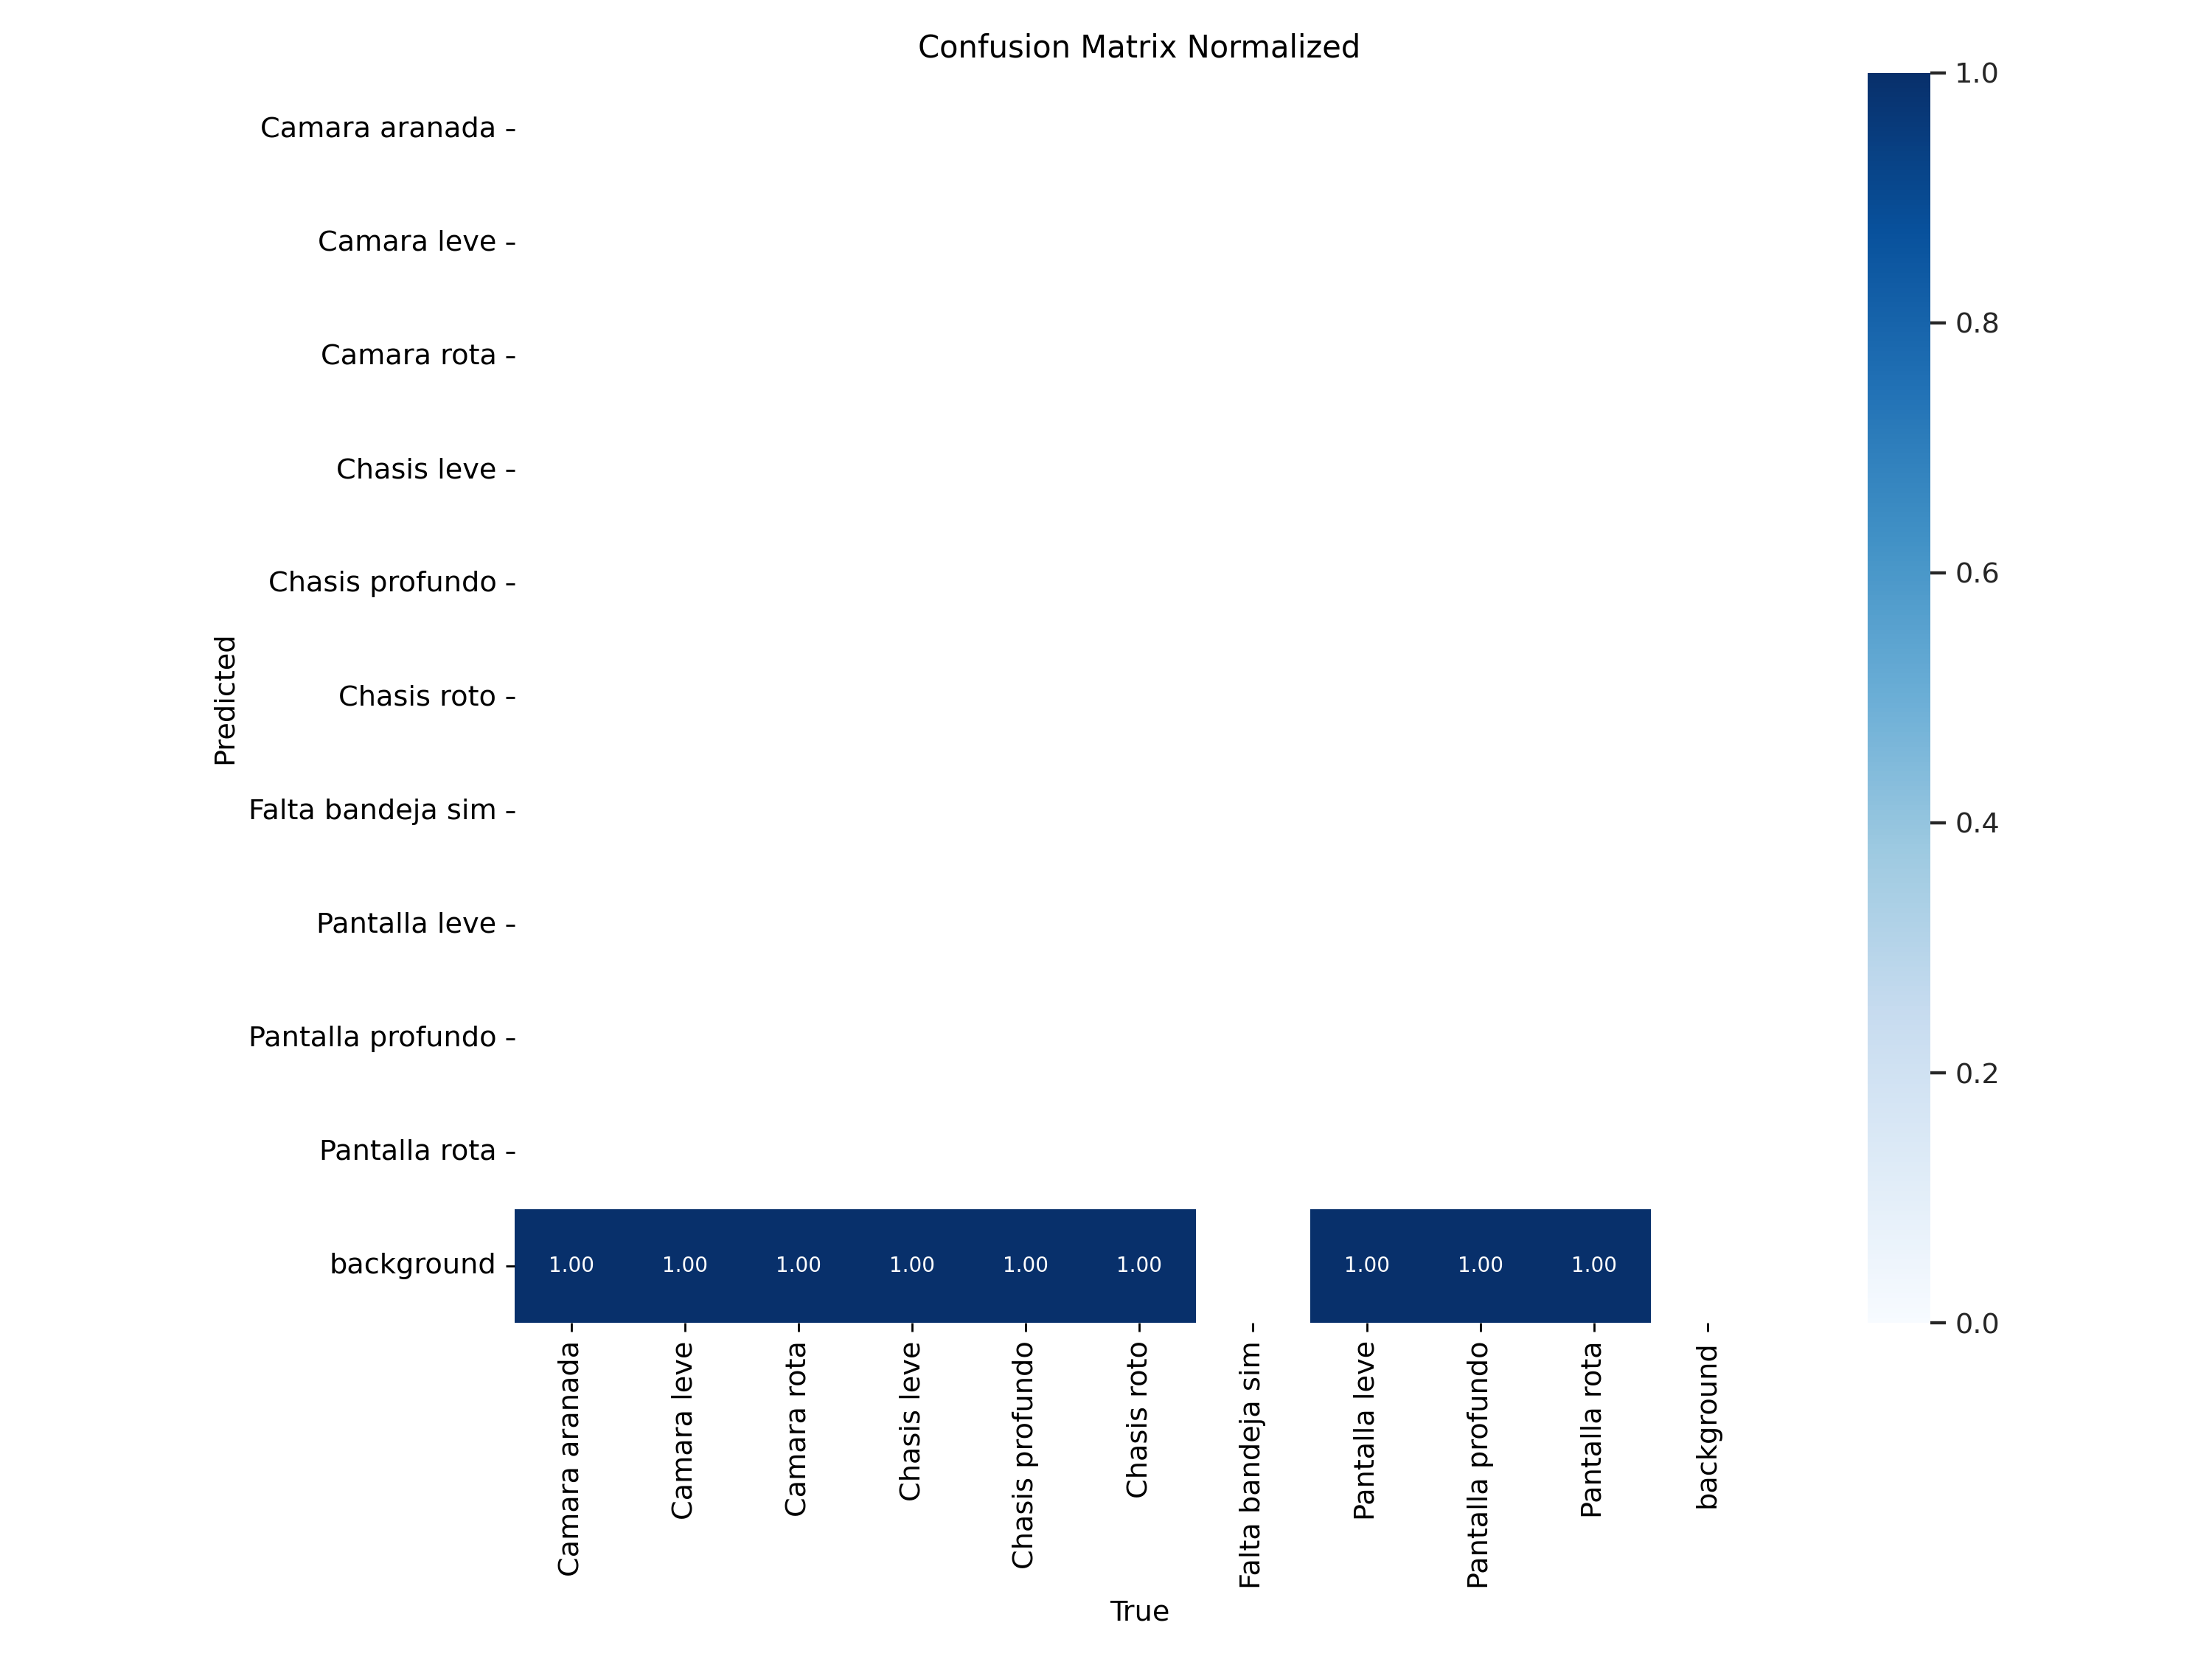


Esta es la matriz de confusión, que como se puede comprobar presenta unos resultados totalmente negativos, ya que todo lo confunde con fondo, y por tanto podemos decir que no tenemos un modelo válido para nuestro objetivo. El resultado de este experimento, da lugar a concluir de que es necesario un estudio previo de los datos para ver si es necesario disminuir la cantidad de etiquetas, usar ventanas deslizantes, es necesario un preprocesamiento de imágenes etc.

In [3]:
from ultralytics import YOLO

model = YOLO('/home/ana/TFM/runs/detect/train6/weights/best.pt')


results = model(['/home/ana/TFM/datasets/desperfectos moviles.v1i.yolov9/test/images/IMG_0001-3-_png.rf.0c4cf1119cbccf32e08694b10256383c.jpg'])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename='result.jpg')  # save to disk


0: 640x480 (no detections), 33.7ms
Speed: 1.5ms preprocess, 33.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/ana/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
